### Data Science Project

In [410]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [411]:
#specify csvs path

folder_path = "Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
#empty df list
dataframes = []

#Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):  #check if the file is csv
        file_path = os.path.join(folder_path, file_name)  #full path of the file
        #read the csv file and append to our list
        dataframes.append(pd.read_csv(file_path))

#Concatenate all dfs into one
merged_data = pd.concat(dataframes, ignore_index=True)

#Save the merged df to a new csv file
output_file = "merged_data.csv"
merged_data.to_csv(output_file, index=False)

print(f"Merged data saved to {output_file}")
merged_data = pd.read_csv("merged_data.csv")
merged_data

Merged data saved to merged_data.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [412]:
#rows with missing values
nan = merged_data[merged_data.isna().any(axis=1)]
display(nan.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [413]:
merged_data.dropna(axis=0, how='all', inplace=True)
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [414]:
# Find rows where 'Order Date' contains text
text_values = merged_data[merged_data['Order Date'].str.contains(r'[a-zA-Z]', na=False)]['Order Date']
print(text_values)
merged_data.shape

519       Order Date
1149      Order Date
1155      Order Date
2878      Order Date
2893      Order Date
             ...    
185164    Order Date
185551    Order Date
186563    Order Date
186632    Order Date
186738    Order Date
Name: Order Date, Length: 355, dtype: object


(186305, 6)

In [415]:
# Identify and drop rows with text in the 'Order Date' column
merged_data = merged_data[~merged_data['Order Date'].str.contains(r'[a-zA-Z]', na=False)]
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [416]:
merged_data.loc[:,'Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'])
merged_data.loc[:,'Price Each'] = pd.to_numeric(merged_data['Price Each'])

#### Add a month column

In [417]:
merged_data = merged_data.copy()
merged_data.loc[:,'Month'] = merged_data['Order Date'].str[0:2]
merged_data.loc[:,'Month'] = merged_data['Month'].astype('int32')
merged_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.0,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.0,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


#### Q1. What was the best month for sales? How much was earned that month?
###### We need sales for that, quantity * price

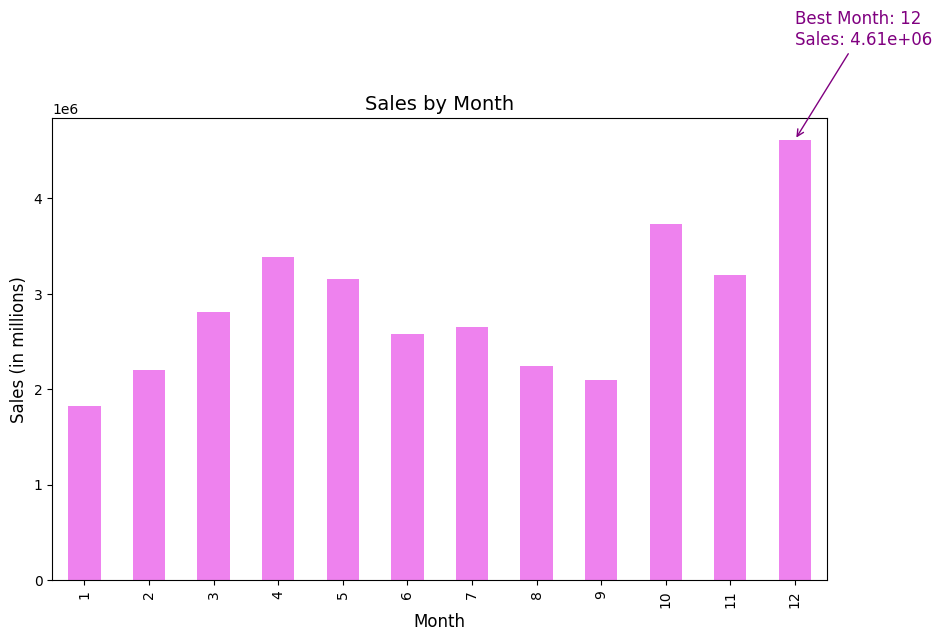

In [418]:
merged_data.loc[:,'Sales'] = merged_data['Quantity Ordered'].astype('int') * merged_data['Price Each'].astype('float')
monthly_sales = merged_data.groupby(['Month'])['Sales'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='violet')
plt.title('Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)

# Show the highest sales month and the amount
best_month = monthly_sales.idxmax()  # Month with highest sales
best_sales = monthly_sales.max()  # Sales amount for best month
plt.annotate(f'Best Month: {best_month}\nSales: {best_sales:.2e}', 
             xy=(best_month - 1, best_sales), 
             xytext=(best_month - 1, best_sales + 1e6), 
             arrowprops=dict(arrowstyle="->", color='purple'),
             fontsize=12, color='purple')

plt.show()



#### Q2. What city has the highest sales?

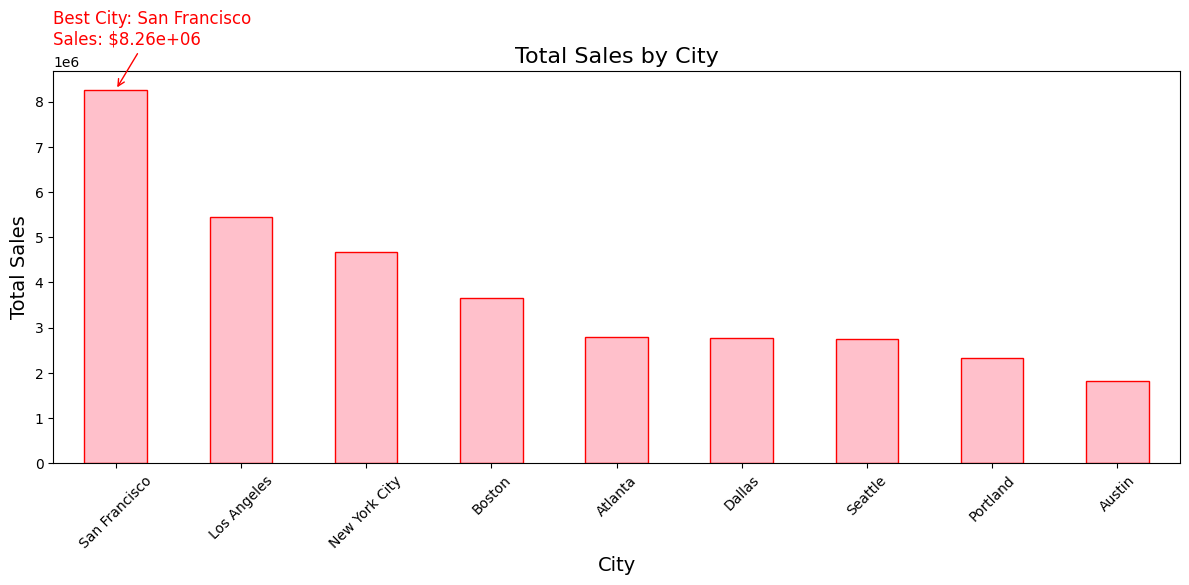

In [419]:
# Extract city from the 'Purchase Address' column
merged_data.loc[:,'City'] = merged_data['Purchase Address'].str.extract(r',\s*([^,]+),')

city_sales = merged_data.groupby('City')['Sales'].sum().sort_values(ascending=False)
top_city = city_sales.idxmax()
top_sales = city_sales.max()

## Plot the bar chart
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='pink', edgecolor='red')
plt.title('Total Sales by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Annotate the city with the highest sales
plt.annotate(f'Best City: {top_city}\nSales: ${top_sales:.2e}', 
             xy=(city_sales.index.get_loc(top_city), top_sales), 
             xytext=(city_sales.index.get_loc(top_city) - 0.5, top_sales + 1e6), 
             arrowprops=dict(arrowstyle="->", color='red'),
             fontsize=12, color='red')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Q3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [420]:
merged_data = merged_data.copy()
# Ensure 'Order Date' is in datetime format
merged_data.loc[:,'Order Date'] = pd.to_datetime(merged_data['Order Date'])

merged_data['Order Date'].dtype

C:\Users\HP\AppData\Local\Temp\ipykernel_9652\4182557657.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data.loc[:,'Order Date'] = pd.to_datetime(merged_data['Order Date'])


dtype('O')

In [421]:
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'], errors='coerce')
print(merged_data[merged_data['Order Date'].isna()])

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month, Sales, City]
Index: []


In [422]:
# Extract hour and minute from 'Order Date' and create new columns
merged_data.loc[:,'Hour'] = merged_data['Order Date'].dt.hour
merged_data.loc[:,'Minute'] = merged_data['Order Date'].dt.minute
merged_data['Count'] = 1

merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30,1
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27,1


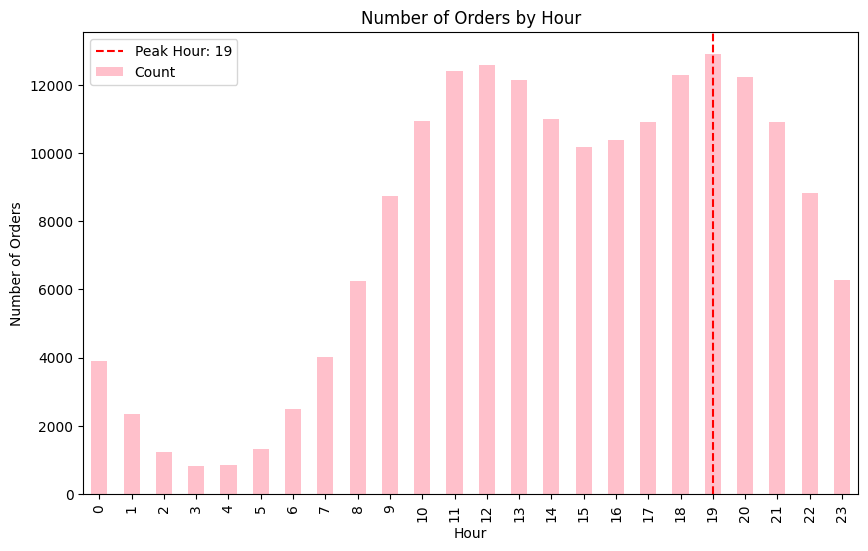

In [429]:
hourly_orders = merged_data.groupby('Hour')['Count'].sum()

peak_hour = hourly_orders.idxmax()  # Hour with the most orders
peak_orders = hourly_orders.max()  # Number of orders in that hour

hourly_orders.plot(kind='bar', figsize=(10, 6), color='pink')
plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.axvline(x=peak_hour, color='red', linestyle='--', label=f'Peak Hour: {peak_hour}')
plt.legend()
plt.show()

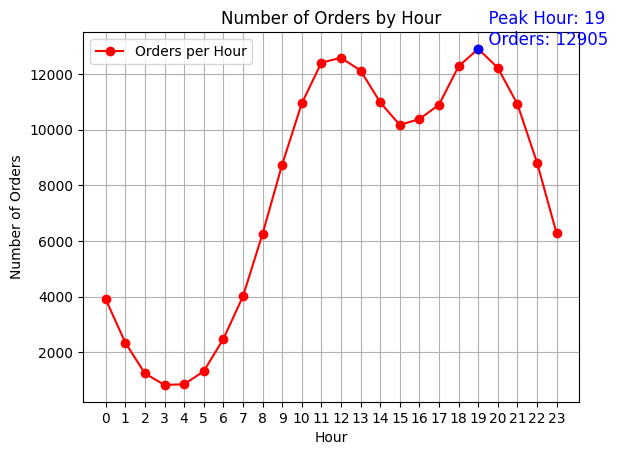

In [430]:
# Plotting the line graph
plt.plot(hourly_orders.index, hourly_orders, color='red', marker='o', linestyle='-', label='Orders per Hour')

plt.scatter(peak_hour, peak_orders, color='blue', zorder=5)  # Red dot for peak hour
plt.text(peak_hour, peak_orders, f'  Peak Hour: {peak_hour}\n  Orders: {peak_orders}', 
         color='blue', fontsize=12, verticalalignment='bottom')

plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(hourly_orders.index)
plt.grid(True)
plt.legend()
plt.show()


#### Answer: A few minutes before 11 am and/or 7pm, is a good time to launch advertisements to maximize sales

### Q4. What products are most often sold together?

In [ ]:
'''from itertools import combinations

order_products = merged_data.groupby('Order ID')['Product'].apply(list) #List of products in each order


pp = [] #List of product combinations
for products in order_products:
    unique_products = list(set(products))  # Remove duplicates by converting to a set
    pp.extend(combinations(sorted(unique_products), 2))
    
pp_df = pd.DataFrame(pp, columns=['Product 1', 'Product 2']) #product pairs df
p_counts = pp_df.groupby(['Product 1', 'Product 2']).size().reset_index(name='Frequency') #pair frequency count

# Sort by frequency to find the most common pairs
top_pairs = p_counts.sort_values(by='Frequency', ascending=False)

# Display the top product pairs
print(top_pairs.head())  # Top 5 pairs

# This counts duplicate products in one order as a separate product which increases the count'''

                    Product 1             Product 2  Frequency
144  Lightning Charging Cable                iPhone       1011
126              Google Phone  USB-C Charging Cable        997
158          Wired Headphones                iPhone        462
128              Google Phone      Wired Headphones        422
101  Apple Airpods Headphones                iPhone        373


In [440]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = merged_data[merged_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter

count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\HP\AppData\Local\Temp\ipykernel_9652\1008677473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


### Q5. What product sold the most? Why do you think it sold the most?

The most sold product is: AAA Batteries (4-pack)
Quantity sold: 31017


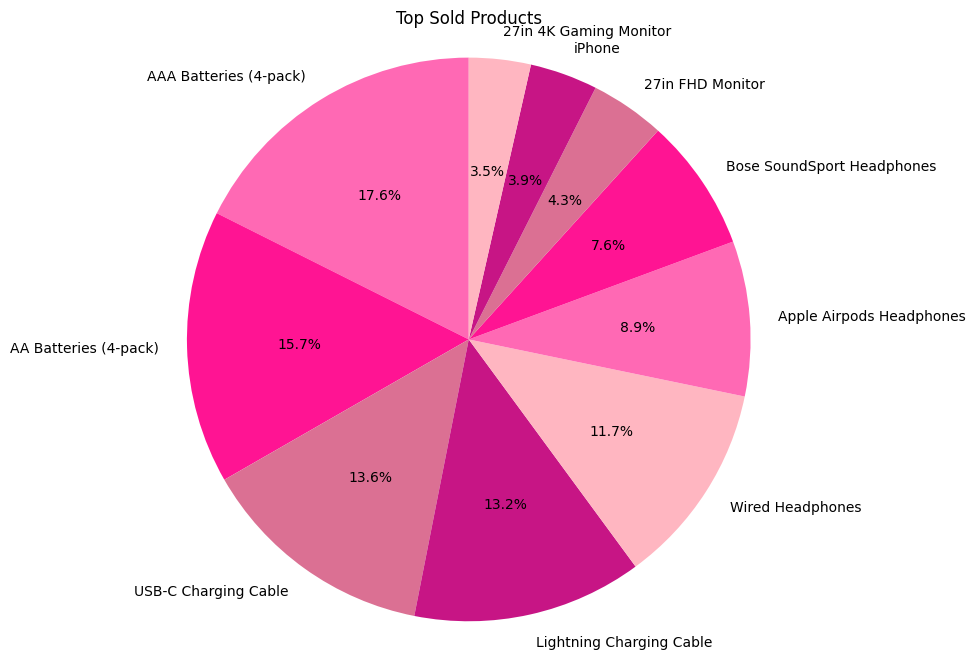

In [446]:
merged_data['Quantity Ordered'] = pd.to_numeric(merged_data['Quantity Ordered'], errors='coerce')

#group by product ans sum quantity
psales = merged_data.groupby('Product')['Quantity Ordered'].sum()

top_p = psales.idxmax()  #most sold product
quant = psales.max()  # its quantity

print(f"The most sold product is: {top_p}")
print(f"Quantity sold: {quant}")

pink_shades = ['#FF69B4', '#FF1493', '#DB7093', '#C71585', '#FFB6C1']  #pink shades for fun cuy i'm just a girlll
#plot pie chart
top_products = psales.nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_products, labels=top_products.index, autopct='%1.1f%%', startangle=90, colors=pink_shades)
plt.title('Top Sold Products')
plt.axis('equal')
plt.show()